In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('./test_model/hoaminzi.jpg')
img.shape

(961, 640, 3)

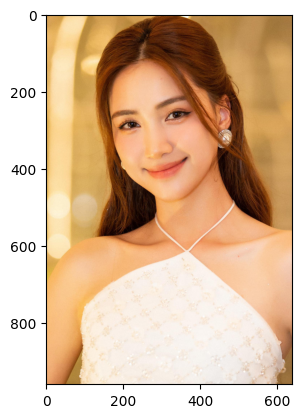

In [3]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(961, 640)

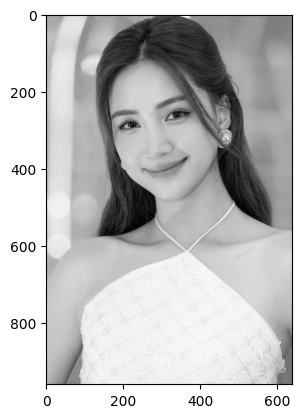

In [5]:
plt.imshow(gray, cmap='gray')

In [6]:
gray

array([[170, 169, 165, ..., 132, 135, 134],
       [167, 167, 165, ..., 136, 133, 131],
       [167, 167, 166, ..., 133, 131, 134],
       ...,
       [184, 183, 179, ..., 121, 121, 118],
       [186, 184, 180, ..., 122, 120, 116],
       [180, 181, 180, ..., 117, 118, 121]], dtype=uint8)

In [7]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[114, 150, 321, 321]])

In [8]:
(x,y,w,h) = faces[0]
x,y,w,h

(114, 150, 321, 321)

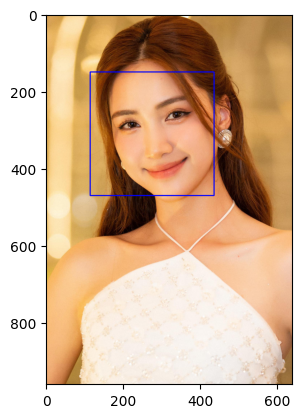

In [9]:
face_img = cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 2)
plt.imshow(cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB))

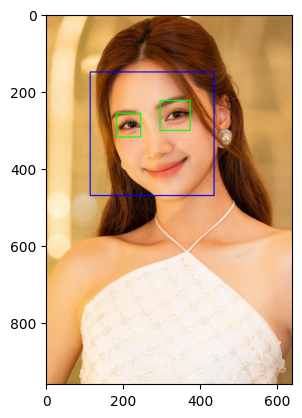

In [10]:
img = cv2.imread('./test_model/hoaminzi.jpg')
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray, 1.3, 5)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color, (ex,ey), (ex+ew, ey+eh), (0,255,0), 2)
        
plt.figure()
plt.imshow(cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB))
plt.show()

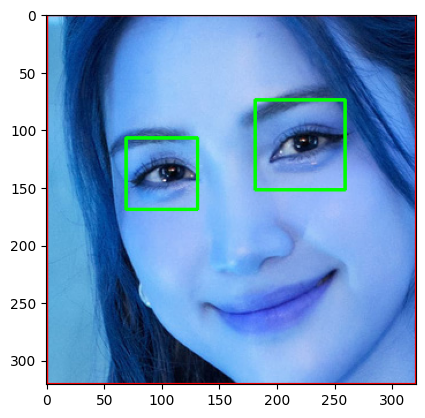

In [11]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [12]:
def get_drop_image_if_2_eyes(image_path):
    img = cv2.imdecode(np.fromfile(image_path, dtype=np.uint8), cv2.IMREAD_UNCHANGED)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray, 1.3, 5)
        if len(eyes) >= 2:
            return roi_color

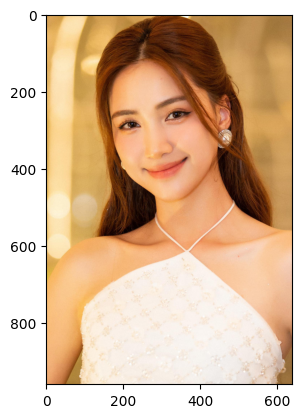

In [13]:
original_image = cv2.imread('./test_model/hoaminzi.jpg')
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))

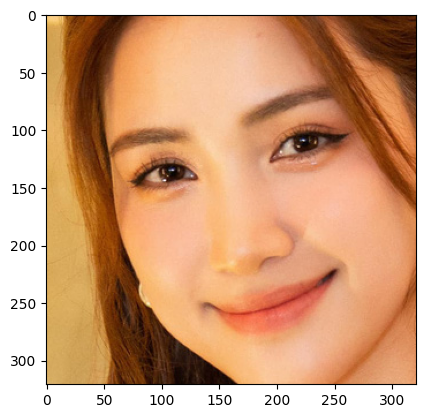

In [14]:
cropped_image = get_drop_image_if_2_eyes('./test_model/hoaminzi.jpg')
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

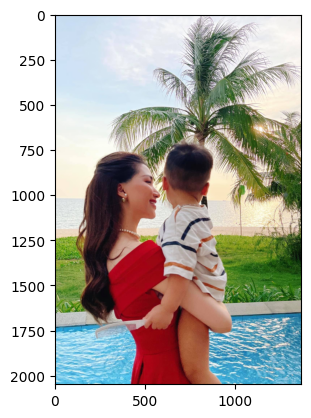

In [15]:
org_image_obstructed = cv2.imread('./test_model/hoaminzi2.jpg')
plt.imshow(cv2.cvtColor(org_image_obstructed, cv2.COLOR_BGR2RGB))

In [16]:
cropped_image_obstructed = get_drop_image_if_2_eyes('./test_model/hoaminzi2.jpg')
cropped_image_obstructed

In [17]:
path_to_data = './dataset/'
path_to_cr_data = './dataset/cropped/'

In [18]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [19]:
img_dirs

['./dataset/hoang_yen_chibi',
 './dataset/hoa_minzi',
 './dataset/son_tung_mtp',
 './dataset/tang_duy_tan']

In [20]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
    
os.mkdir(path_to_cr_data)

In [21]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    for entry in os.scandir(img_dir):
        # print(entry.path)
        roi_color = get_drop_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.mkdir(cropped_folder)
                print('Generating cropped images in folder: ', cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + '.png'
            cropped_file_path = cropped_folder + '/' + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict.setdefault(celebrity_name, []).append(cropped_file_path)
            count+=1

hoang_yen_chibi
Generating cropped images in folder:  ./dataset/cropped/hoang_yen_chibi
hoa_minzi
Generating cropped images in folder:  ./dataset/cropped/hoa_minzi
son_tung_mtp
Generating cropped images in folder:  ./dataset/cropped/son_tung_mtp
tang_duy_tan
Generating cropped images in folder:  ./dataset/cropped/tang_duy_tan


In [22]:
import numpy as np
import pywt
import cv2

def w2d(img, mode='haar', level=1):
    imArray = img
    # Datatype conversion
    #convert to grayscale
    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
    #convert to float
    imArray = np.float32(imArray)
    imArray /= 255
    # compute coeffocients
    coeffs=pywt.wavedec2(imArray, mode, level=level)
    
    #process coefficients
    coeffs_H=list(coeffs)
    coeffs_H[0] *= 0
    
    #reconstruction
    imArray_H = pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H

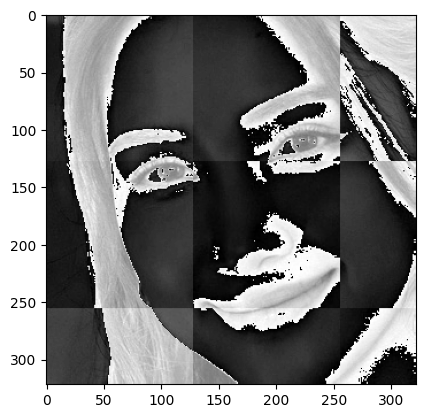

In [27]:
im_har = w2d(cropped_image, 'db1',7)
plt.imshow(im_har, cmap='gray')


In [28]:
celebrity_file_names_dict

{'hoang_yen_chibi': ['./dataset/cropped/hoang_yen_chibi/hoang_yen_chibi1.png',
  './dataset/cropped/hoang_yen_chibi/hoang_yen_chibi2.png',
  './dataset/cropped/hoang_yen_chibi/hoang_yen_chibi3.png',
  './dataset/cropped/hoang_yen_chibi/hoang_yen_chibi4.png',
  './dataset/cropped/hoang_yen_chibi/hoang_yen_chibi5.png',
  './dataset/cropped/hoang_yen_chibi/hoang_yen_chibi6.png',
  './dataset/cropped/hoang_yen_chibi/hoang_yen_chibi7.png',
  './dataset/cropped/hoang_yen_chibi/hoang_yen_chibi8.png',
  './dataset/cropped/hoang_yen_chibi/hoang_yen_chibi9.png',
  './dataset/cropped/hoang_yen_chibi/hoang_yen_chibi10.png',
  './dataset/cropped/hoang_yen_chibi/hoang_yen_chibi11.png',
  './dataset/cropped/hoang_yen_chibi/hoang_yen_chibi12.png',
  './dataset/cropped/hoang_yen_chibi/hoang_yen_chibi13.png',
  './dataset/cropped/hoang_yen_chibi/hoang_yen_chibi14.png',
  './dataset/cropped/hoang_yen_chibi/hoang_yen_chibi15.png',
  './dataset/cropped/hoang_yen_chibi/hoang_yen_chibi16.png',
  './dataset/c

In [29]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict['hoang_yen_chibi']

0

In [81]:
X = []
y = []

for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_file in training_files:
        img = cv2.imread(training_file)
        if img is None:
            continue
        scaled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img, 'db1', 4)
        scaled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scaled_raw_img.reshape(32*32*3,1), scaled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [82]:
len(X)

199

In [83]:
len(X[0])

4096

In [84]:
32*32*3 + 32*32

4096

In [85]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(199, 4096)

### Model

In [86]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [88]:
pipe = Pipeline([('scaler', StandardScaler()),('svc', SVC(kernel = 'rbf', C = 10))])

In [89]:
pipe

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC(C=10))])

In [90]:
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.62

In [91]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.62      0.45      0.53        11
           1       0.75      0.82      0.78        11
           2       0.38      0.50      0.43        10
           3       0.71      0.67      0.69        18

    accuracy                           0.62        50
   macro avg       0.62      0.61      0.61        50
weighted avg       0.63      0.62      0.62        50



### Grid search

In [92]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
import pandas as pd

In [93]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params': {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [94]:
scores = []
best_estimators = {}
for algo, configs in model_params.items():
    pipe = make_pipeline(StandardScaler(), configs['model'])
    clf = GridSearchCV(pipe, configs['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_

df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
df

,model,best_score,best_params
0,svm,0.705057,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.516782,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.745287,{'logisticregression__C': 1}


In [97]:
best_estimators['logistic_regression'].score(X_test, y_test)

0.68

In [98]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_estimators['logistic_regression'].predict(X_test))

In [99]:
cm

array([[ 7,  3,  1,  0],
       [ 3,  8,  0,  0],
       [ 1,  0,  6,  3],
       [ 0,  0,  5, 13]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

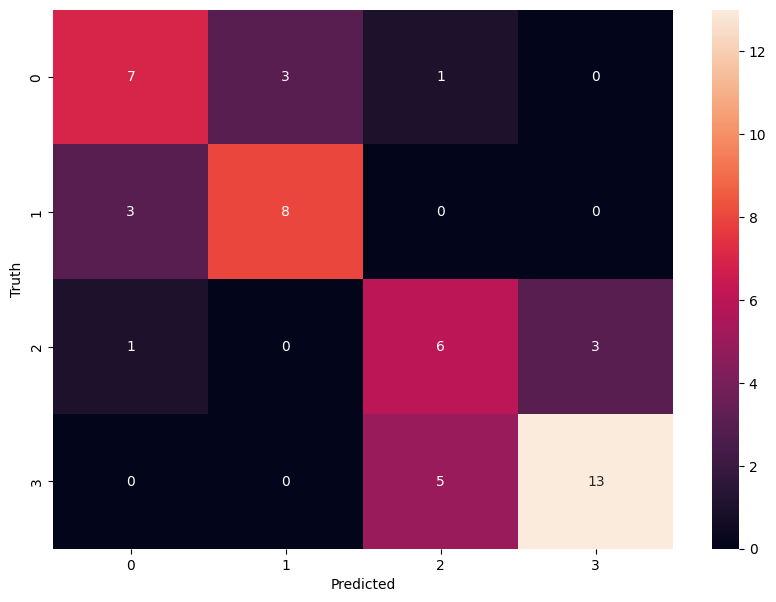

In [100]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [101]:
import joblib

# Save the model as a pickle in a file
joblib.dump(best_estimators['logistic_regression'], 'saved_model.pkl')

['saved_model.pkl']

In [69]:
import json

with open('class_dictionary.json', 'w') as f:
    f.write(json.dumps(class_dict))
    